In [56]:
import pandas as pd

# Load datasets
df_train = pd.read_csv("train_BRCpofr.csv")

# Function to clean a dataset
def clean_data(df):
    # Remove duplicate rows
    df = df.drop_duplicates()
    
    # Handle missing values (filling with median for numeric, mode for categorical)
    for col in df.columns:
        if df[col].dtype == 'object':
            df[col].fillna(df[col].mode()[0], inplace=True)  # Fill categorical with mode
        else:
            df[col].fillna(df[col].median(), inplace=True)  # Fill numeric with median
    
    # Standardize column names (lowercase, replace spaces with underscores)
    df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")
    
    return df

# Clean dataset
df_train_cleaned = clean_data(df_train)

# Save cleaned dataset
df_train_cleaned.to_csv("Cleaned Train.csv", index=False)


In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [67]:
# Load Dataset
df = pd.read_csv("train_BRCpofr.csv")


In [68]:
# Set style
sns.set(style="whitegrid")

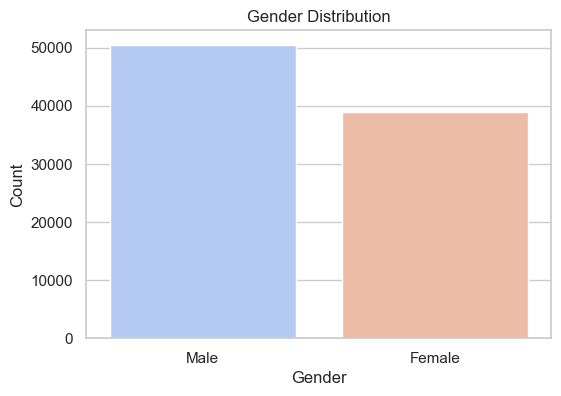

In [69]:
# 1️⃣ Bar Chart - Gender Distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='gender', data=df, palette='coolwarm')
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

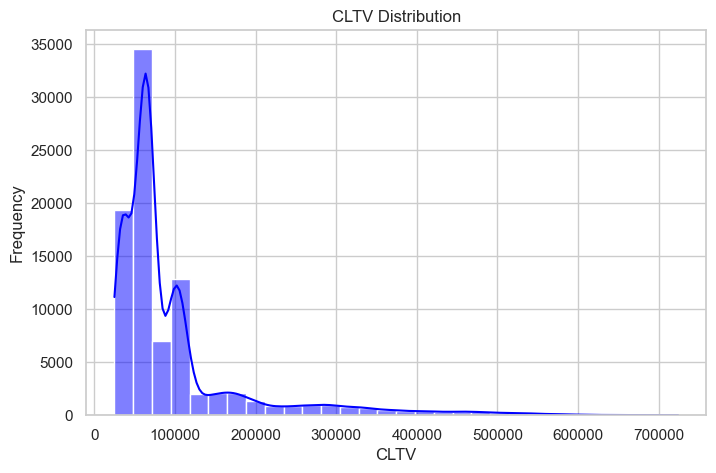

In [70]:
# 2️⃣ Histogram - CLTV Distribution
plt.figure(figsize=(8, 5))
sns.histplot(df['cltv'], bins=30, kde=True, color='blue')
plt.title("CLTV Distribution")
plt.xlabel("CLTV")
plt.ylabel("Frequency")
plt.show()

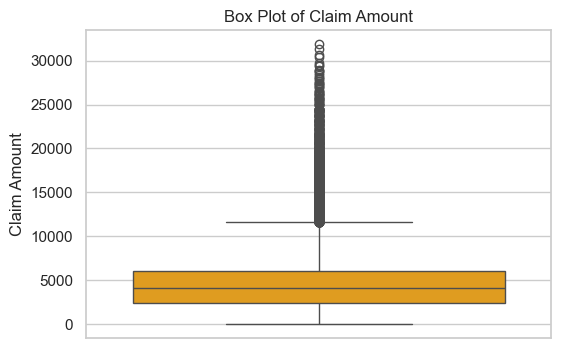

In [71]:
# 3️⃣ Box Plot - Claim Amount
plt.figure(figsize=(6, 4))
sns.boxplot(y=df['claim_amount'], color='orange')
plt.title("Box Plot of Claim Amount")
plt.ylabel("Claim Amount")
plt.show()

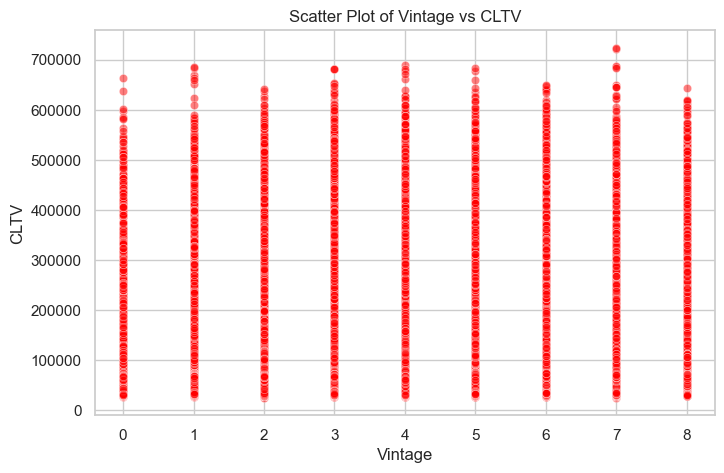

In [72]:
# 4️⃣ Scatter Plot - Vintage vs CLTV
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['vintage'], y=df['cltv'], alpha=0.5, color='red')
plt.title("Scatter Plot of Vintage vs CLTV")
plt.xlabel("Vintage")
plt.ylabel("CLTV")
plt.show()

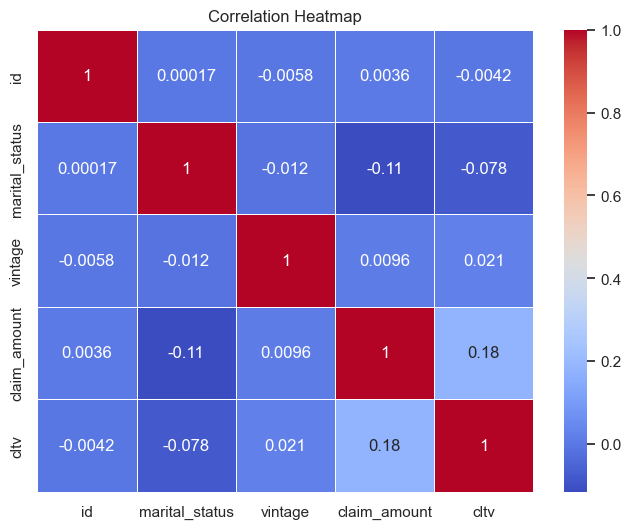

In [73]:
# 5️⃣ Heatmap - Correlation of Numerical Variables
plt.figure(figsize=(8, 6))
numeric_cols = df.select_dtypes(include=['int64', 'float64'])
sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()
